In [0]:
# all plots will be set directly below the code cell that produced it
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import clear_output
# set inline plots size
import math
import numpy as np
import time
import os
import cv2
from google.colab.patches import cv2_imshow
import zipfile
import tarfile
from collections import namedtuple
from google.colab.patches import cv2_imshow
from xml.dom import minidom
import pandas as pd
from google.colab import files
import csv

In [0]:
!git clone 'https://github.com/UralmashFox/CV_Project'
%cd CV_Project
df1 = pd.read_csv('book.csv', na_values='-', sep = ';') 
df1 = df1.fillna(0)
!pip install patool
import patoolib
patoolib.extract_archive("pngs.rar", outdir="/content")
%cd ..

In [261]:
import nltk
nltk.download('punkt')
from nltk import tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
 def to_BoWs(sentances):
  i = 0
  BoW = []
  all_BoW = []
  for sentance in sentances:
    words = sentance.split()
    BoW = []
    for word in words:
      word = word.lower()
      word = word.replace('.', '')
      word = word.replace('!', '')
      word = word.replace(',', '')
      word = word.replace('-', '')
      word = word.replace(':', '')
      BoW.append(word)
    all_BoW.append(BoW)
  return(all_BoW)

In [0]:
 def get_info (all_BoW): 
  obj = df1.obj
  code = df1.code
  flip = df1.flip
  axis_x = df1.x
  axis_y = df1.y
  all_ID = []
  true_ID = []
  all_flip = []
  all_y = []
  all_x = []

  for BoW in all_BoW:
    num = 0
    val = 0
    ID = []
    y = []
    x = []
    flips = []
    x_h = 0
    y_h = 0
    for word in BoW:
      for index, row in enumerate(obj):
        if word == row:
          try:
            val = int(code[index])
            num = num+val
          except:
            ID.append(code[index])
            flips.append(flip[index])
            try:
              x.append(float(axis_x[index].replace(',', '.')))
              y.append(float(axis_y[index].replace(',', '.')))
            except:
              if isinstance(axis_x[index], int): x.append(axis_x[index])
              else: x.append(x[len(x)-1])
              if isinstance(axis_y[index], int): y.append(axis_y[index])
              else: y.append(y[len(y)-1])

    ID.append(num)
    all_x.append(x)
    all_y.append(y)
    all_ID.append(ID)
    all_flip.append(flips)
  return(all_ID, all_flip, all_x, all_y)

In [0]:
 def real_ID(all_ID):
  trueID = []
  for IDs in all_ID:
    ident = []
    for id in IDs:
      if (id == 'hb0') or (id == 'hb1'):
        true_id = str(id) + '_' + str(IDs[len(IDs)-1]) + 's'
        ident.append(true_id)
      elif not isinstance(id, int):
        true_id = id
        ident.append(true_id)
    trueID.append(ident)
  return(trueID)

In [0]:
def to_background(background, image, x,y):
  hi, wi, ci = image.shape
  hb, wb, cb = background.shape
  for w in range(0, wi):
    for h in range (0, hi):
      if not (image[h][w][3] == 0 ):
        background[int(h+hb*y), int(x*wb+w)] = image[h][w]
  return(background)

In [0]:
def to_one_array(images, flips, all_x, all_y):
  back_i = []
  back_f = []
  back_x = []
  back_y = []

  for image in images:
    for img in image:
      back_i.append(img)
  for flip in flips:
    for flp in flip:
      back_f.append(flp)
  for X in all_x:
    for x in X:
      back_x.append(x)
  for Y in all_y:
    for y in Y:
      back_y.append(y)
  return(back_i, back_f, back_x, back_y)

In [0]:
 def text2img(all_ID, all_flip, all_x, all_y): 
  background =  cv2.imread('background.png', cv2.IMREAD_UNCHANGED)
  images, flips, x, y = to_one_array(trueID, all_flip, all_x, all_y)
  # print(images, flips, x, y)
  for IMG in images:
    img = IMG + '.png'
    image = cv2.imread(img, cv2.IMREAD_UNCHANGED)
    if images.index(IMG) < len(images)-1:
      if x[images.index(IMG)+1] == x[images.index(IMG)] and y[images.index(IMG)+1] == y[images.index(IMG)]:
        x[images.index(IMG)+1] = x[images.index(IMG)+1] + x[images.index(IMG)]*3/30
        y[images.index(IMG)+1] = y[images.index(IMG)+1]-image.shape[0]/2500
      # print(x[images.index(IMG)+1] == x[images.index(IMG)] and y[images.index(IMG)+1] == y[images.index(IMG)])
    if flips[images.index(IMG)]:
      image = cv2.flip(image, 1)
    try:
      background = to_background(background, image, x[images.index(IMG)], y[images.index(IMG)])
    except:
      image = cv2.resize(image, (int(image.shape[0]/4), int(image.shape[1]/2)))
      background = to_background(background, image, x[images.index(IMG)], y[images.index(IMG)])
    # cv2_imshow(image)
  return(background)

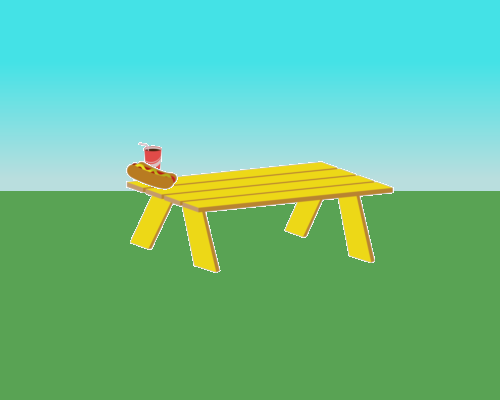

In [299]:
text = "On the table there is a drink and hotdog"
#step by step: -1- split sentances -2- split words -3- find IDs, coordinates, flips -4- find name of img files -5- images to background
sentances = tokenize.sent_tokenize(text)
all_BoW = to_BoWs(sentances)
all_ID, all_flip, all_x, all_y = get_info(all_BoW)
trueID = real_ID(all_ID)
final_image = text2img(all_ID, all_flip, all_x, all_y)
cv2_imshow(final_image)